# Load Clean Data 📁

In [2]:
# Import libraries
import pandas as pd       
import seaborn as sns               
import numpy as np                      
import matplotlib.pyplot as plt                       

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

In [3]:
# Import and Read data 
data = pd.read_pickle("mpg_cleaned.pkl")

# Define X and y data for the model
X = data.drop(columns=['mpg', 'car_name','car_maker']).values
y = data["mpg"].values

# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaler Variable 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Data Shape
print(f"X_train Shape: {X_train.shape}") 
print(f"y_train Shape: {y_train.shape}")

# Test Data Shape
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (313, 8)
y_train Shape: (313,)
X_test Shape: (79, 8)
y_test Shape: (79,)


# Torch -- 🔥🐂

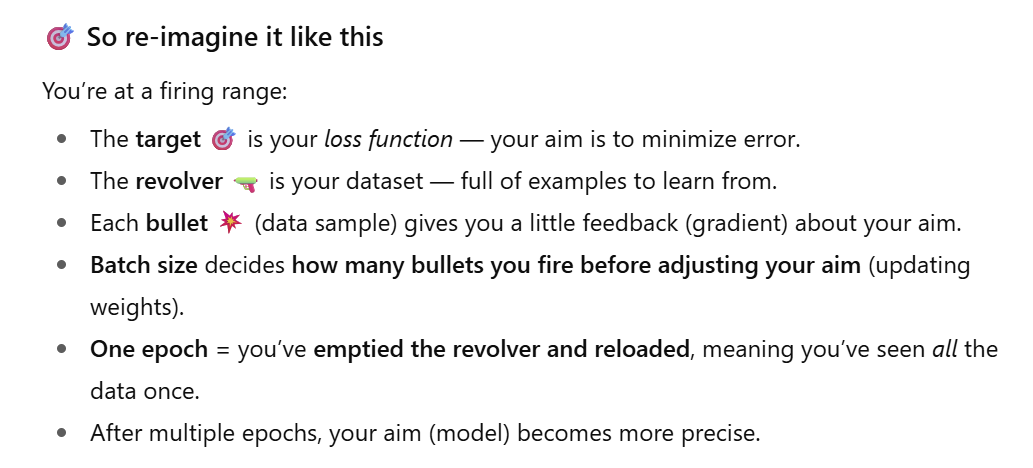

In [5]:
# Import Libraries for pytorch deep neural network 
import torch
import torch.nn as nn     


In [22]:
# Convert the numpy to tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test, dtype=torch.float).reshape(-1,1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float).reshape(-1,1)

print(X_train_tensor.dtype)
print(X_test_tensor.shape)
print(y_test_tensor.shape)
print(y_train_tensor.shape)

torch.float32
torch.Size([79, 8])
torch.Size([79, 1])
torch.Size([313, 1])


In [24]:
X_test_tensor.shape[1]

8

In [ ]:
Xtrain_tensor = torch.from_numpy(X_train)
Xtest_tensor = torch.from_numpy(X_test)
ytest_tensor = torch.from_numpy(y_test).reshape(-1,1)
ytrain_tensor = torch.from_numpy(y_train).reshape(-1,1)

print(Xtrain_tensor.dtype)

torch.float64


In [14]:
# Convert the training data to Tensor Datasets
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

print(len(train_dataset))

313


In [23]:
train_loaded = DataLoader(train_dataset, batch_size=30, shuffle=True)
test_loaded = DataLoader(test_dataset, batch_size=30, shuffle=False)

In [38]:
for features, labels in train_loaded:
    print(f"{features} ,{labels}")

tensor([[-0.8732, -1.0282, -1.1144, -1.3588, -0.0868,  1.0464,  0.5511,  1.7414],
        [ 0.3049,  0.0240, -0.2510, -0.0978,  0.1621, -0.8850, -0.6898,  0.9409],
        [ 1.4829,  1.5877,  1.8420,  0.9941, -1.6152, -0.8850, -0.6898, -1.5608],
        [ 1.4829,  1.5008,  0.8740,  1.1537, -0.8332,  0.7704, -0.6898,  0.4405],
        [ 0.3049, -0.2656,  0.4031,  0.9930,  0.4109, -0.0573,  0.5511,  0.3405],
        [ 1.4829,  1.0471,  1.1879,  0.8167, -1.4375, -0.8850, -0.6898, -1.5608],
        [ 0.3049,  0.0433, -0.2510,  0.2011,  0.9440,  0.4945, -0.6898, -0.8603],
        [-0.8732, -0.5841, -0.5388, -0.8230, -1.4019,  1.5982, -0.6898, -0.4600],
        [-0.8732, -0.7675, -0.3818, -1.0278, -0.5488, -1.4369,  0.5511,  0.7407],
        [-0.8732, -0.7193,  0.1414, -0.3883, -0.5488, -0.8850,  0.5511,  1.2411],
        [-0.8732, -0.7193,  0.2722, -0.3752, -0.7266, -0.3332,  0.5511,  1.2411],
        [ 1.4829,  1.1823,  1.1879,  1.2990, -0.5488, -1.1609, -0.6898,  0.9409],
        [ 0.3049

In [74]:
class MyRegModel(nn.Module):
    def __init__(self, input_dim):
        super(MyRegModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)
         
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x
        
model = MyRegModel(input_dim=X_train_tensor.shape[1])

In [78]:
# from torch.utils.optim import optim

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 300
for epoch in range(epochs):
    model.train() # set model to train mode/ use model.evaluate to evaluate the model
    running_loss = 0
    
    for features, labels in train_loaded:
        optimizer.zero_grad() # first instance of gradient set to zero
        output = model(features) # make an initial prediction of training features
        loss = loss_func(output, labels) # calculate the loss funciton based on y_predict outputs
        
        loss.backward() # conduct back propagation on the data to update the weights and bias along the layers
        optimizer.step() # user you optimizer to update the step-size during training
        
        # print(running_loss)
        # print(f"[Running loss:{running_loss}],[Loss:{loss}], [Loss_item:{loss.item()}]")
        # print(f"[Loss:{loss}]")
        running_loss += loss.item() # converts single-value tensor into a python float
        
    if (epoch+1) % 10 == 0:
        avg_loss = running_loss/len(train_loaded)
        print(f"[Epochs: {epoch+1}/{epochs}][Loss:{avg_loss:.2f}]")


[Epochs: 10/300][Loss:1.52]
[Epochs: 20/300][Loss:1.93]
[Epochs: 30/300][Loss:1.58]
[Epochs: 40/300][Loss:1.65]
[Epochs: 50/300][Loss:1.44]
[Epochs: 60/300][Loss:1.48]
[Epochs: 70/300][Loss:1.37]
[Epochs: 80/300][Loss:1.82]
[Epochs: 90/300][Loss:3.37]
[Epochs: 100/300][Loss:1.76]
[Epochs: 110/300][Loss:1.49]
[Epochs: 120/300][Loss:2.45]
[Epochs: 130/300][Loss:1.31]
[Epochs: 140/300][Loss:1.27]
[Epochs: 150/300][Loss:1.28]
[Epochs: 160/300][Loss:1.29]
[Epochs: 170/300][Loss:1.01]
[Epochs: 180/300][Loss:1.59]
[Epochs: 190/300][Loss:1.40]
[Epochs: 200/300][Loss:1.49]
[Epochs: 210/300][Loss:1.23]
[Epochs: 220/300][Loss:0.88]
[Epochs: 230/300][Loss:1.20]
[Epochs: 240/300][Loss:0.72]
[Epochs: 250/300][Loss:1.17]
[Epochs: 260/300][Loss:1.15]
[Epochs: 270/300][Loss:0.78]
[Epochs: 280/300][Loss:0.83]
[Epochs: 290/300][Loss:1.04]
[Epochs: 300/300][Loss:1.33]


In [ ]:
# Xtorch = torch.column_stack(
#    [ torch.tensor(X_train, dtype=torch.float) ]  
# )

# print(Xtorch)

tensor([[ 0.3049,  0.2846,  0.1414,  ...,  0.4945, -0.6898, -0.4600],
        [-0.8732, -0.5359, -0.3295,  ..., -0.0573, -0.6898, -1.0604],
        [ 0.3049, -0.2367, -0.1987,  ..., -0.3332, -0.6898, -0.2599],
        ...,
        [-0.8732, -0.4297, -0.5126,  ...,  0.4945, -0.6898,  0.6407],
        [-0.8732, -0.9413, -1.0359,  ...,  1.3223, -0.6898, -0.2599],
        [ 1.4829,  1.9738,  1.1879,  ..., -0.8850, -0.6898, -0.8603]])


In [79]:
from sklearn.metrics import mean_squared_error, r2_score


model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_true = y_test_tensor.numpy()

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.3f}")


Test MSE: 8.549
Test RMSE: 2.924
Test R²: 0.832
